<a href="https://colab.research.google.com/github/srujankumar3008/ML_PROJECT/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#df is the dataframe
df = pd.read_csv("/content/spam.csv",encoding = "ISO-8859-1")
df.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#finding null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
#dropping null values
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
#df1 = df

In [ ]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.rename(columns = {"v1" : "Spam or Ham", "v2":"Mail Message"},inplace = True)
df1.head()


,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string as list
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
#     text = re.sub(r'\W+', '', text)
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # remove stopwors from text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#df1['Mail Message'] = df1['Mail Message'].apply(clean_text)
print(df1.shape)
df1.head()

(5572, 2)


,Spam or Ham,Mail Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
def encode(text):
  if text == 'spam':
    return 1
  else: return 0

In [ ]:
#Converting the categorical values into numerical values
df1['Spam or Ham']=df1['Spam or Ham'].apply(encode)
df1.head()

,Spam or Ham,Mail Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Finding duplicates
df1.duplicated().sum()

403

In [ ]:
#dropping duplicates
df1 = df1.drop_duplicates(keep = 'first')

In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1.duplicated().sum()


0

In [ ]:
#Splitting the data
X =  df1["Mail Message"]
y =df1["Spam or Ham"]



<Axes: >

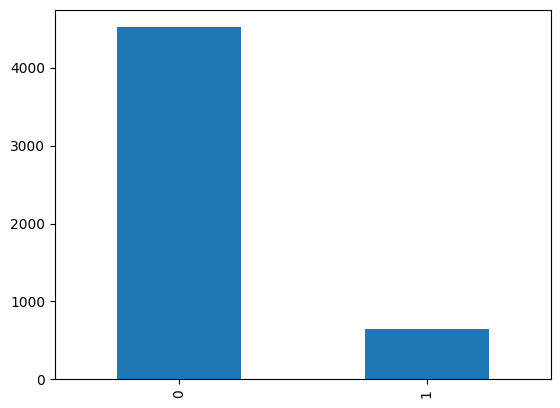

In [ ]:
df1['Spam or Ham'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [ ]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)


In [ ]:
# Convert the text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(X_train.values)
x_test = cv.transform(X_test)
x_train.toarray()
#x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Fitting multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix , recall_score , precision_score
from sklearn.metrics import accuracy_score

In [ ]:
#Testing  the mail (spam/ham)

mail_ham = ['Same. Wana plan a trip sometme then']
mail_ham_count = cv.transform(mail_ham)
y_pred = model.predict(mail_ham_count)
y_pred


array([0])

In [ ]:
#finding accuracy of the training dataset
model.score(x_train,y_train)


0.9939540507859734

In [ ]:

#finding accuracy of the test dataset
X_test_count = cv.transform(X_test)
model.score(X_test_count,y_test)



0.9816247582205029

KNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

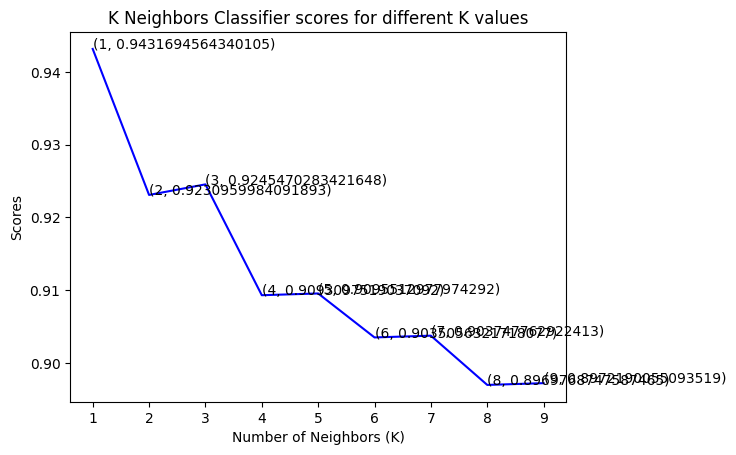

In [ ]:
plt.plot([k for k in range(1, 10)], knn_scores, color = 'blue')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.9431694564340105

In [ ]:
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[884   1]
 [ 56  93]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       885
           1       0.99      0.62      0.77       149

    accuracy                           0.94      1034
   macro avg       0.96      0.81      0.87      1034
weighted avg       0.95      0.94      0.94      1034

0.9448742746615088


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[884   1]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.88      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

0.9816247582205029


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTclassifier.fit(x_train, y_train)
y_pred= DTclassifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[875  10]
 [ 18 131]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       885
           1       0.93      0.88      0.90       149

    accuracy                           0.97      1034
   macro avg       0.95      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034

0.9729206963249516


In [ ]:
from sklearn.svm import SVC

SVMclassifier = SVC(kernel='linear', random_state=0)
SVMclassifier.fit(x_train, y_train)
y_pred= SVMclassifier.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[883   2]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       885
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034

0.9854932301740812


In [ ]:
from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(x_train.toarray(), y_train)
y_pred= NBclassifier.predict(x_test.toarray())

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[803  82]
 [ 16 133]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       885
           1       0.62      0.89      0.73       149

    accuracy                           0.91      1034
   macro avg       0.80      0.90      0.84      1034
weighted avg       0.93      0.91      0.91      1034

0.9052224371373307


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
forest.fit(x_train, y_train)
y_pred= forest.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[885   0]
 [ 23 126]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       885
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

0.9777562862669246


In [ ]:
from joblib import dump, load
dump(SVMclassifier, 'SVMclassifier.joblib')
dump(cv, 'cv.joblib')

['cv.joblib']

In [ ]:
from joblib import dump, load
def predict(sample):
    encode_model = load('cv.joblib')
    clf = load('SVMclassifier.joblib')

    #clean_text_list = clean_text(sample)
    feature_vector = encode_model.transform([sample]).reshape(1, -1)
    pred = clf.predict(feature_vector)
    if pred[0] == 1:
      return 'SPAM'
    else:
      return 'HAM'

In [ ]:
predict("	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'SPAM'

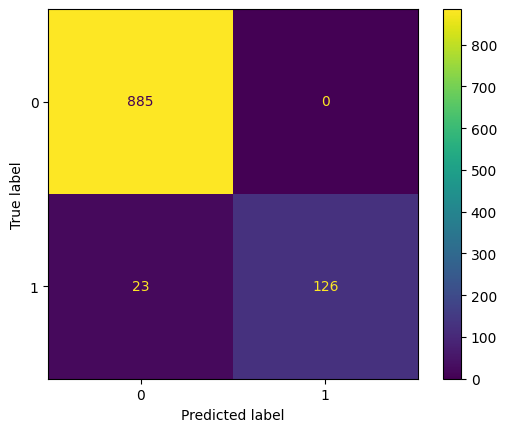

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    input = gr.Textbox(label="Sample",placeholder="Enter data in document or path of pdf document",lines=2)
    output = gr.Textbox(label="Category")
    greet_btn = gr.Button("Submit")
    greet_btn.click(fn=predict, inputs=input, outputs=output)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
demo = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=2, placeholder="Text Here..."),
    outputs="text",
)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>